<a href="https://colab.research.google.com/github/akumar98630/lambton/blob/main/Assingment_4_Akash_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [3]:
# Load Boston Housing dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame  # DataFrame with 506 rows and 14 columns


In [4]:
# Basic data inspection
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.55

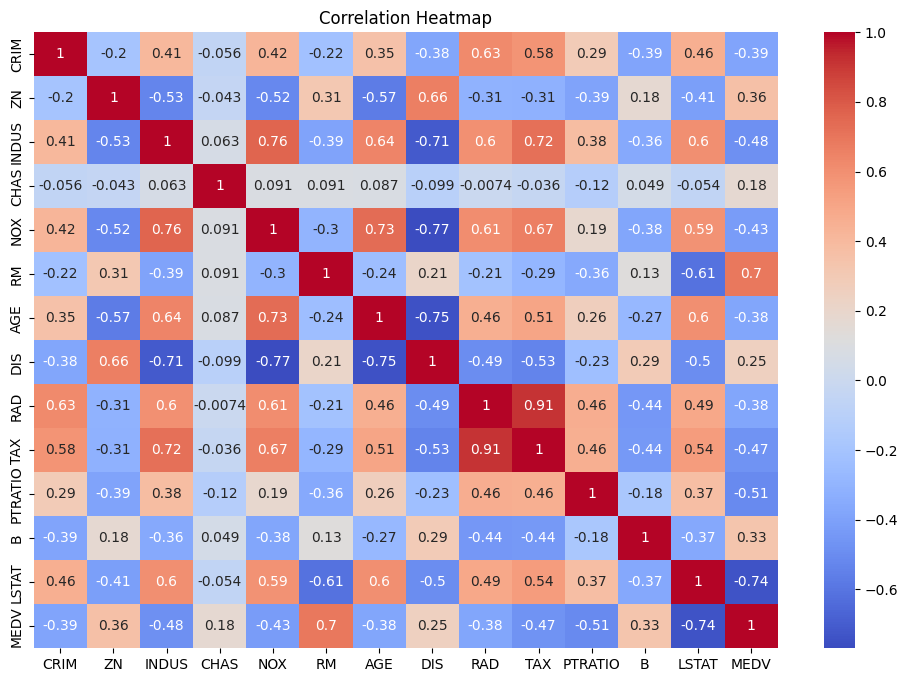

In [5]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

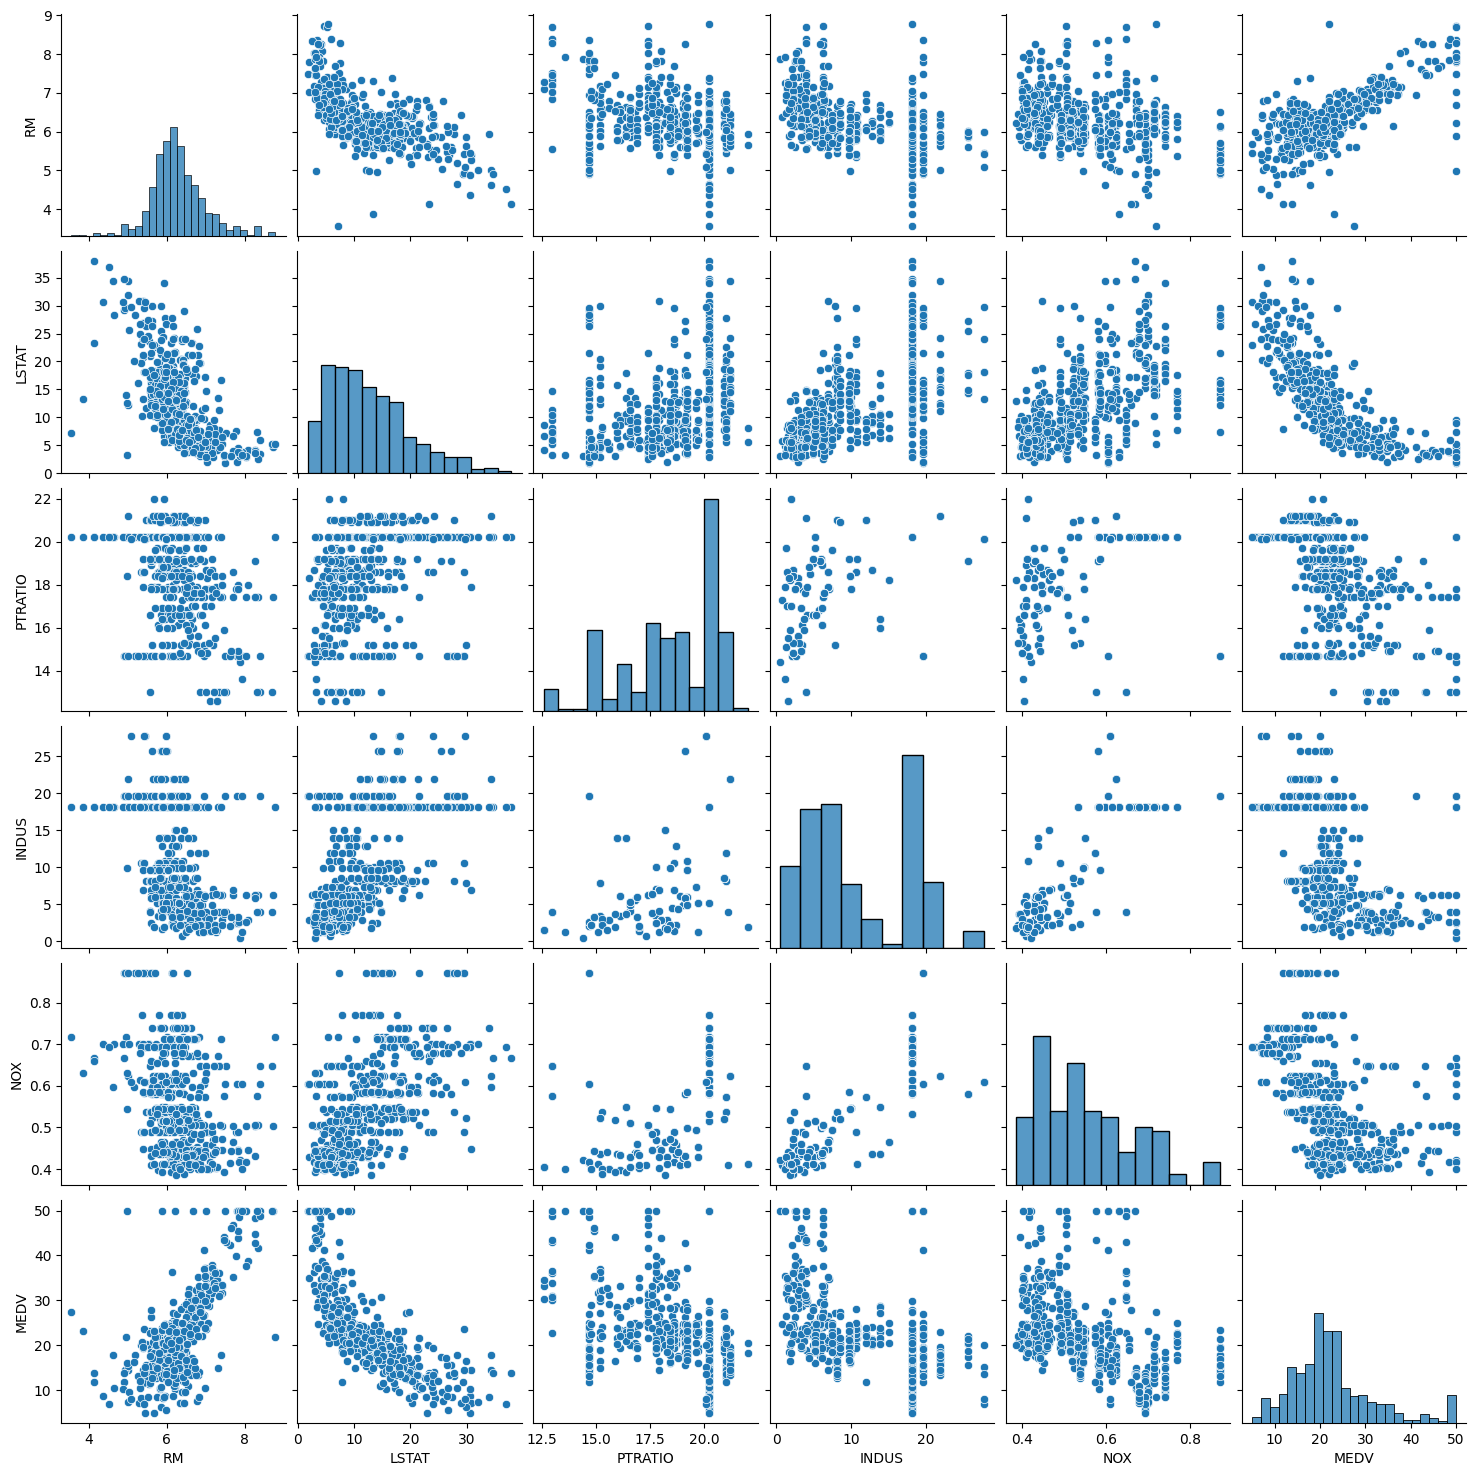

In [6]:
# Pairplot
sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'NOX', 'MEDV']])
plt.show()

In [7]:
# Define feature and target
X = df[['RM']]
y = df['MEDV']

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict
y_pred = lr.predict(X_test)

In [11]:
# Evaluate
print("Simple Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Simple Linear Regression Results:
R² Score: 0.3707569232254778
MAE: 4.478335832064149
RMSE: 6.792994578778734


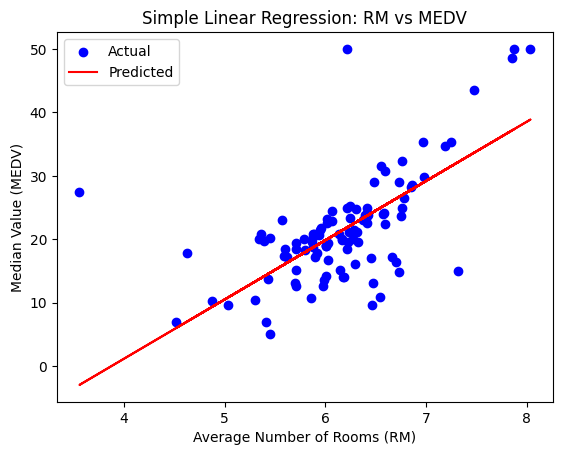

In [12]:
# Plot RM vs MEDV
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV)')
plt.title('Simple Linear Regression: RM vs MEDV')
plt.legend()
plt.show()

In [13]:
# Find top 5 features most correlated with MEDV
correlations = df.corr()['MEDV'].drop('MEDV').abs().sort_values(ascending=False)
top5_features = correlations.head(5).index.tolist()
print("Top 5 Features:", top5_features)

Top 5 Features: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


In [14]:
# Prepare data
X = df[top5_features]
y = df['MEDV']

In [15]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict
y_pred = mlr.predict(X_test)

In [18]:
# Evaluate
print("\nMultiple Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Multiple Linear Regression Results:
R² Score: 0.6196683547405641
MAE: 3.3357265551811968
RMSE: 5.281208043853636


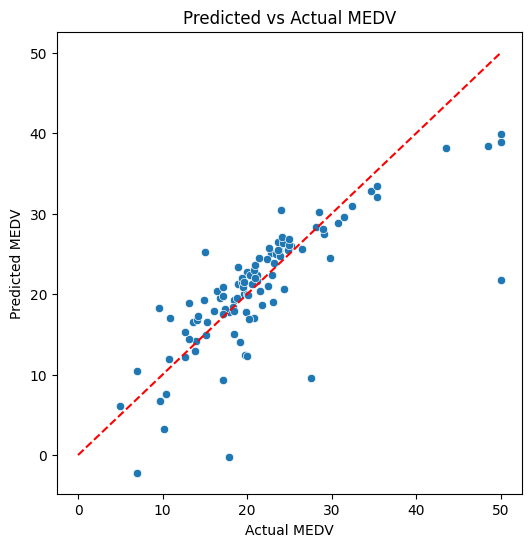

In [19]:
# Predicted vs Actual Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 50], [0, 50], 'r--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Predicted vs Actual MEDV")
plt.show()

In [20]:
# Residuals
residuals = y_test - y_pred

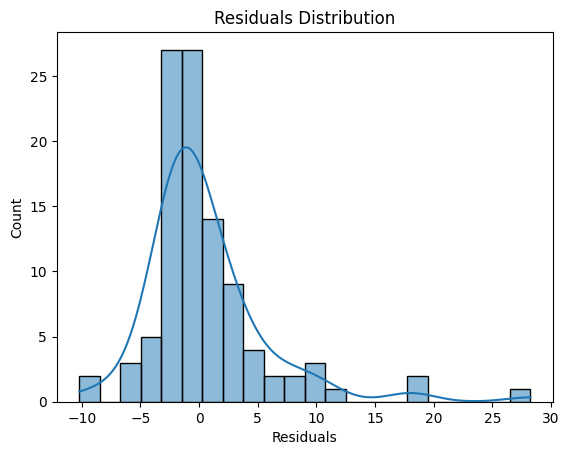

In [21]:
# Residuals Histogram
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

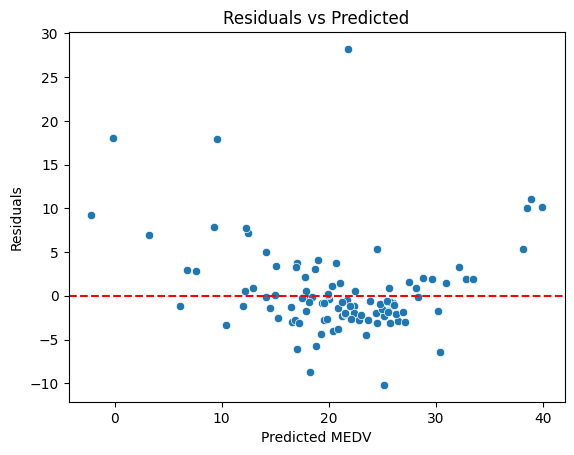

In [22]:
# Residuals vs Predicted
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()